<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/sherifmost/DeepLearning/blob/master/Labs/lab1/lab1_part2.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Copyright Information

**Parts of this lab are based on Kaggle kernels.**

# Lab 1 - Part2: Logistic Regression

![Logistic Regression](https://raw.githubusercontent.com/KhaledElTahan/AUC-DeepLearning/master/Labs/lab1/logistic_regression.png)

## 1.2.1 Problem Statement

Here, we are trying to increase the people's attention regarding the heart diseases. Like any disease, it is always better to know if you are sick early so you can get the treatment you need before it is too late. Therefore, we use a dataset that gathered some information about two groups: a group with a heart disease and the other group has no disease.
The gathered information includes age, chest pain type, fasting blood sugar, etc. 

Your goal is to train a logistic regression model to predict if a person has a heart disease or not depending on the given information.

## 1.2.2 Problem Details

Let's dive into the code, explain it and show you the parts you need to fill!

### 1.2.2.1 Import Needed packages

Pay close attention to the packages I imported for you.

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.initializers import RandomNormal, RandomUniform
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalHinge
from tensorflow.keras import regularizers

### 1.2.2.2 Work on the dataset

This dataset contains 13 features that demonstrate the health state of a person and our target (0 if this person does not have a heart disease and 1 if he has a heart disease.)

We first load the dataset.

In [70]:
dataset = pd.read_csv("https://raw.githubusercontent.com/KhaledElTahan/DeepLearning/master/Labs/lab1/lab1_heart.csv")

A sneak peak on the dataset and how it looks like.

In [71]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Define input and output.

In [72]:
x = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

**TODO: Preprocess your data**

1.   Do you need to scale the data? Which type of scaling is better? 
2.   Perhaps you might want to add non-linearity by adding artificial features.

![The effect of the boundary with artificial features](https://raw.githubusercontent.com/KhaledElTahan/AUC-DeepLearning/master/Labs/lab1/artificial_features_boundaries.png)

You might have a look on part1 preprocessing and take hints from there. 

**Try different types of data preprocessing and include their effect on the accuracy in your report.**


In [73]:
cubic_x = x ** 4
x = np.concatenate((x, cubic_x), axis=1)
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

Split dataset into, training, validation and testing splits.

In [74]:
# Get Training Data
train_x, temporary_x, train_y, temporary_y = train_test_split(x, y, train_size=0.75, random_state=0)

# Get Validation & Testing Data
val_x, test_x, val_y, test_y = train_test_split(temporary_x, temporary_y, train_size=0.5, random_state=0)

### 1.2.2.3 Define your model here (TODO)

Logistic Regression as a model is exactly like the Linear Regression except for the activation function. 

Use this fact to define your model similar to part1 except for the activation function.

![Logistic Regression using Simple Perceptron](https://raw.githubusercontent.com/KhaledElTahan/AUC-DeepLearning/master/Labs/lab1/perceptron_activation.png)

**TODO**: 
1. Try different activation functions and include in the report their effect on the accuracy and the training plot.
2. Try different regularizers and include in the report their effect on the accuracy and the training plot.


In [75]:
activation = 'softmax'

model = tf.keras.models.Sequential([tf.keras.Input(shape=(test_x.shape[1],)),
  tf.keras.layers.Dense(1,
  #kernel_regularizer=tf.keras.regularizers.L1(0.001),
  activity_regularizer=tf.keras.regularizers.L2(0.03),
  activation = activation
  )
])

### 1.2.2.4 Compile your model and print a summary

**TODO**
1. Try different losses functions and include in the report their effect on the accuracy. Make sure that those losses functions are meant only for classification! Don't use losses functions that are meant for prediction!
2. Try different optimizers and include in the report their effect on the accuracy and the training plot.

In [76]:
## TODO Try Different losses & optimizers here
model.compile(loss=BinaryCrossentropy(), metrics=['accuracy'], optimizer=Adam())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 27        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


### 1.2.2.5 Train your model

In [77]:
hist = model.fit(train_x, train_y, verbose=1, validation_data=(val_x, val_y), batch_size=16, epochs=500)

Epoch 1/500
15/15 [==============================] - 1s 12ms/step - loss: 0.7585 - accuracy: 0.5374 - val_loss: 0.5934 - val_accuracy: 0.5263
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7249 - accuracy: 0.5374 - val_loss: 0.5699 - val_accuracy: 0.5263
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.5374 - val_loss: 0.5509 - val_accuracy: 0.5263
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.5374 - val_loss: 0.5322 - val_accuracy: 0.5263
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.5374 - val_loss: 0.5150 - val_accuracy: 0.5263
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6286 - accuracy: 0.5374 - val_loss: 0.5000 - val_accuracy: 0.5263
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.5374 - val_loss: 0.4866 - val_accuracy: 0.5263
Epoch 8/500


Evaluate your testing split, to get the accuracy and the loss score.

In [78]:
score, accuracy = model.evaluate(test_x, test_y, batch_size=16, verbose=0)
print("Test fraction correct (NN-Loss) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (NN-Loss) = 0.37
Test fraction correct (NN-Accuracy) = 0.61


### 1.2.2.6 Visualize Accuracy

Plot the training and validation accuracy. Try to interpret those plots. 


**TODO: for each experiment you make, include this plot and indicate whether there exist any type of *overfitting or underfitting*.**

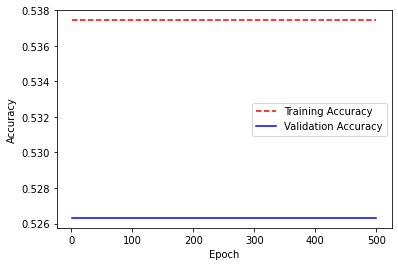

In [79]:
# Get training and test loss histories
training_loss = hist.history['accuracy']
val_loss = hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

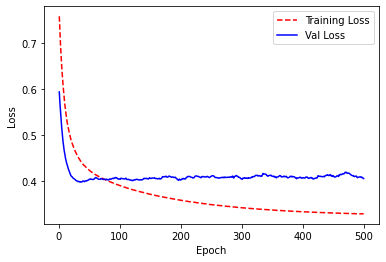

In [80]:
# Get training and test loss histories
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 1.2.3 Conclusion

That's it! Congratulations on training a logistic regression model.

Make sure you deliver all the requirements for the submission.